[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  5 of 5 completed


                                TCS.NS                                         \
Price                        Adj Close        Close         High          Low   
Ticker                          TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                            
2023-01-02 00:00:00+00:00  3111.856934  3261.449951  3266.850098  3235.199951   
2023-01-03 00:00:00+00:00  3159.468506  3311.350098  3320.000000  3245.300049   
2023-01-04 00:00:00+00:00  3162.616943  3314.649902  3327.350098  3286.199951   
2023-01-05 00:00:00+00:00  3159.229736  3311.100098  3337.300049  3281.949951   
2023-01-06 00:00:00+00:00  3064.245850  3211.550049  3301.550049  3200.000000   

                                                 RELIANCE.NS               \
Price                             Open   Volume    Adj Close        Close   
Ticker                          TCS.NS   TCS.NS  RELIANCE.NS  RELIANCE.NS   
Date                                   

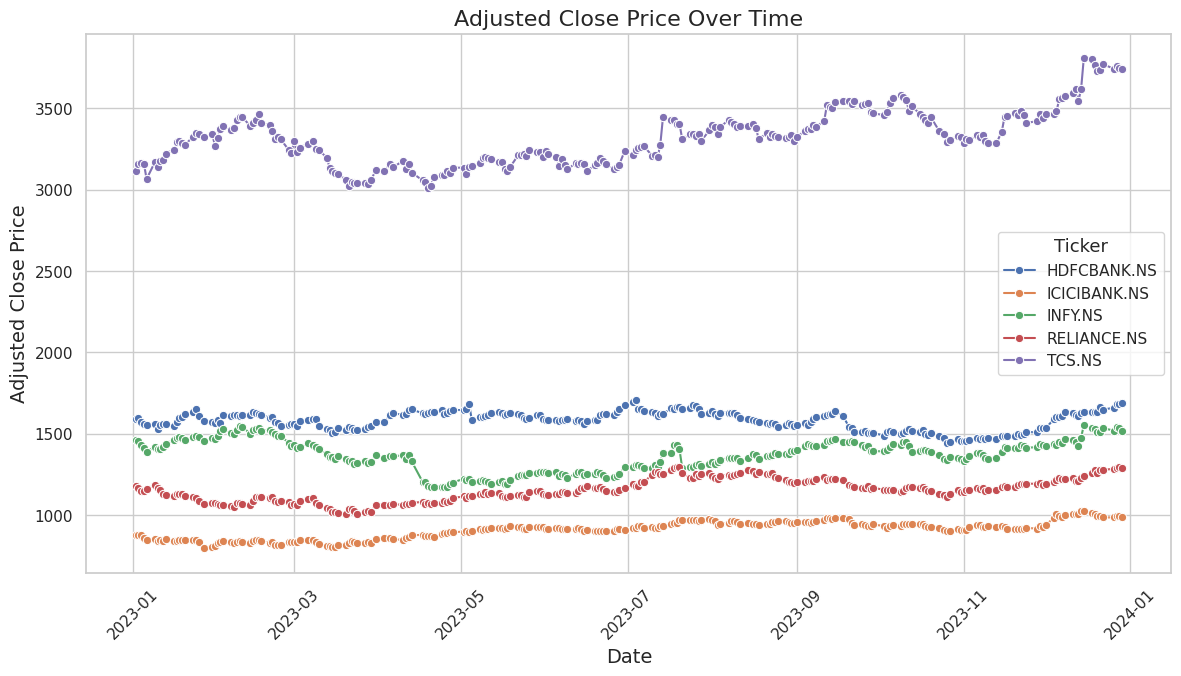

[*********************100%***********************]  5 of 5 completed


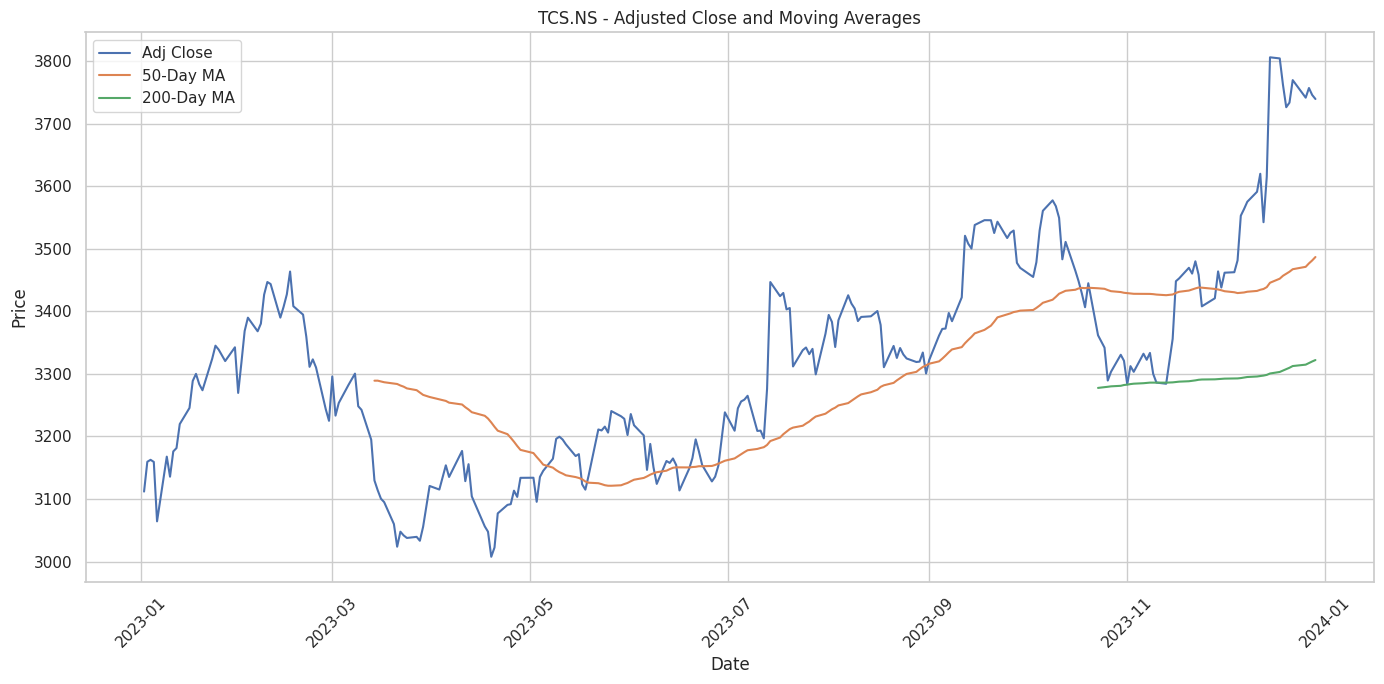

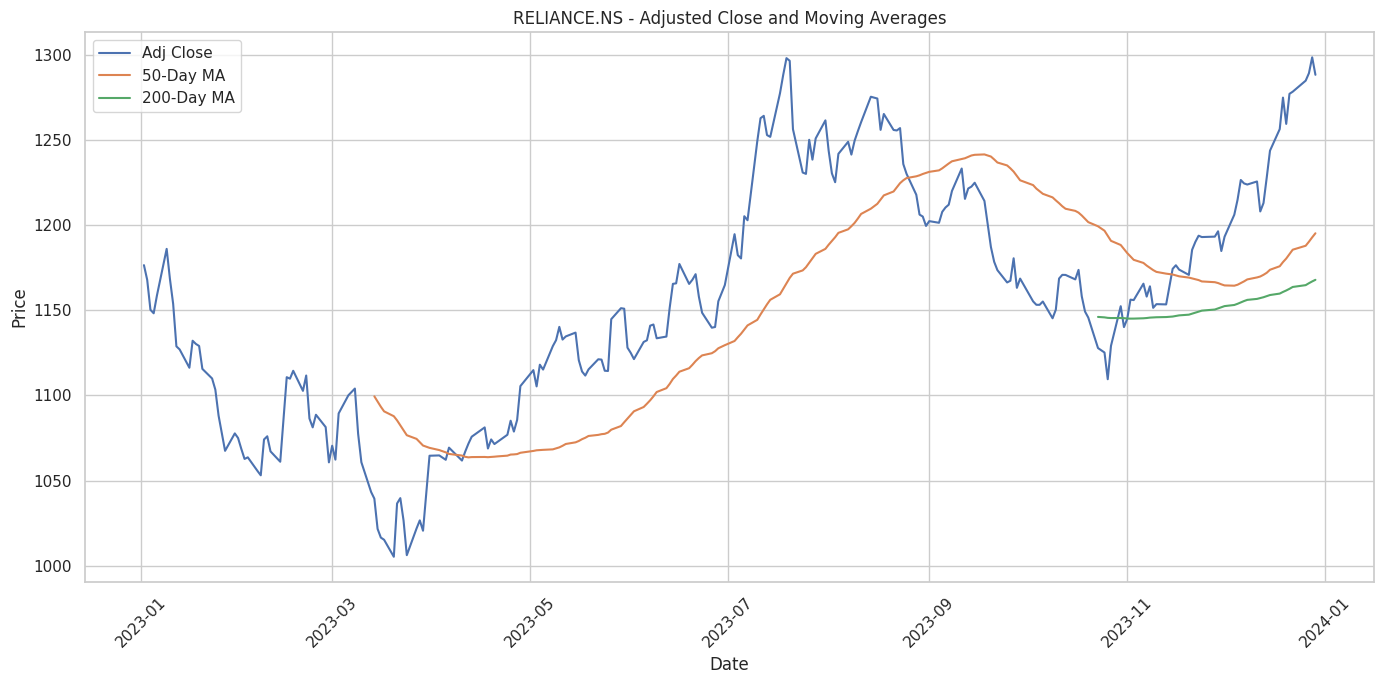

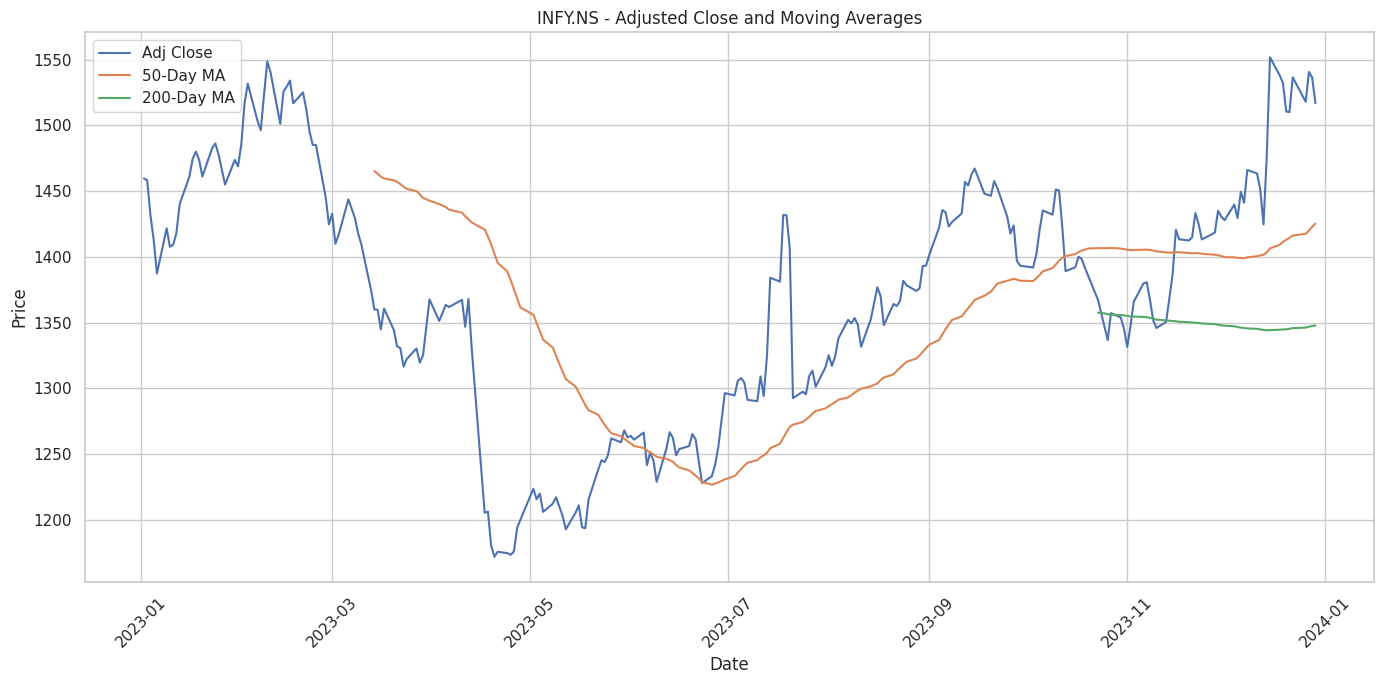

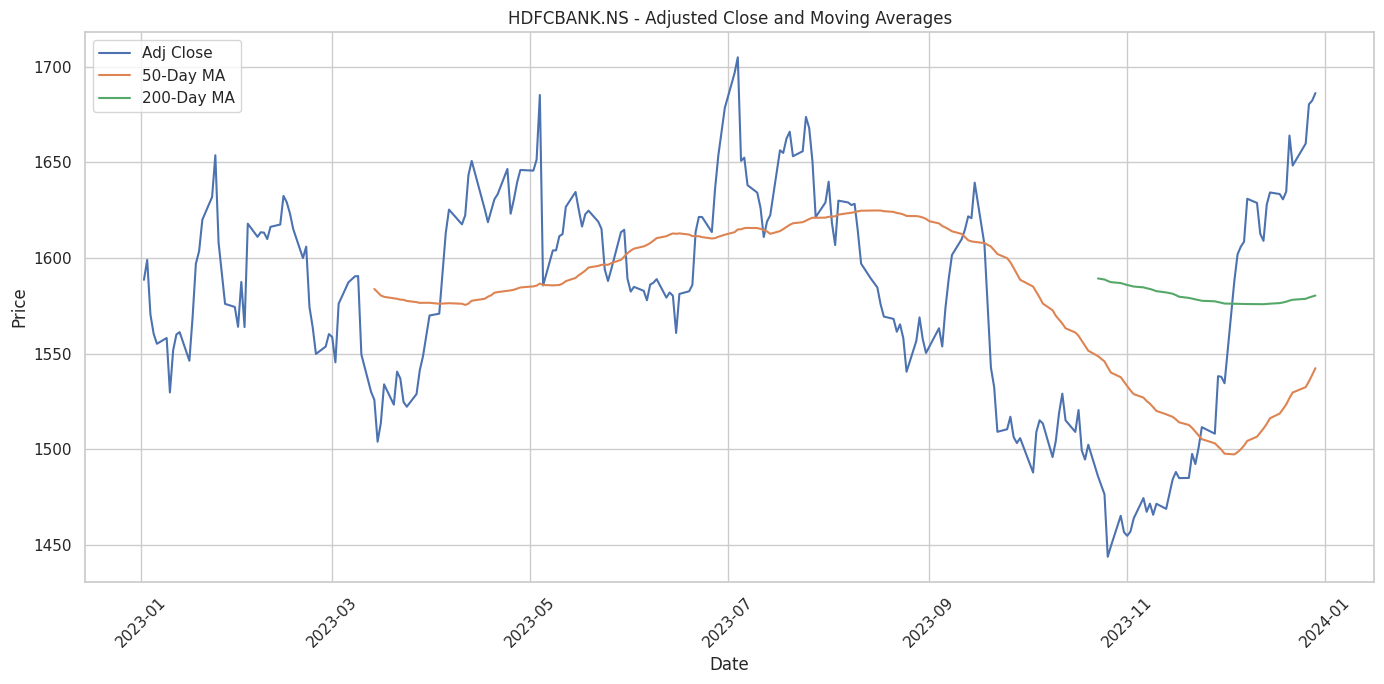

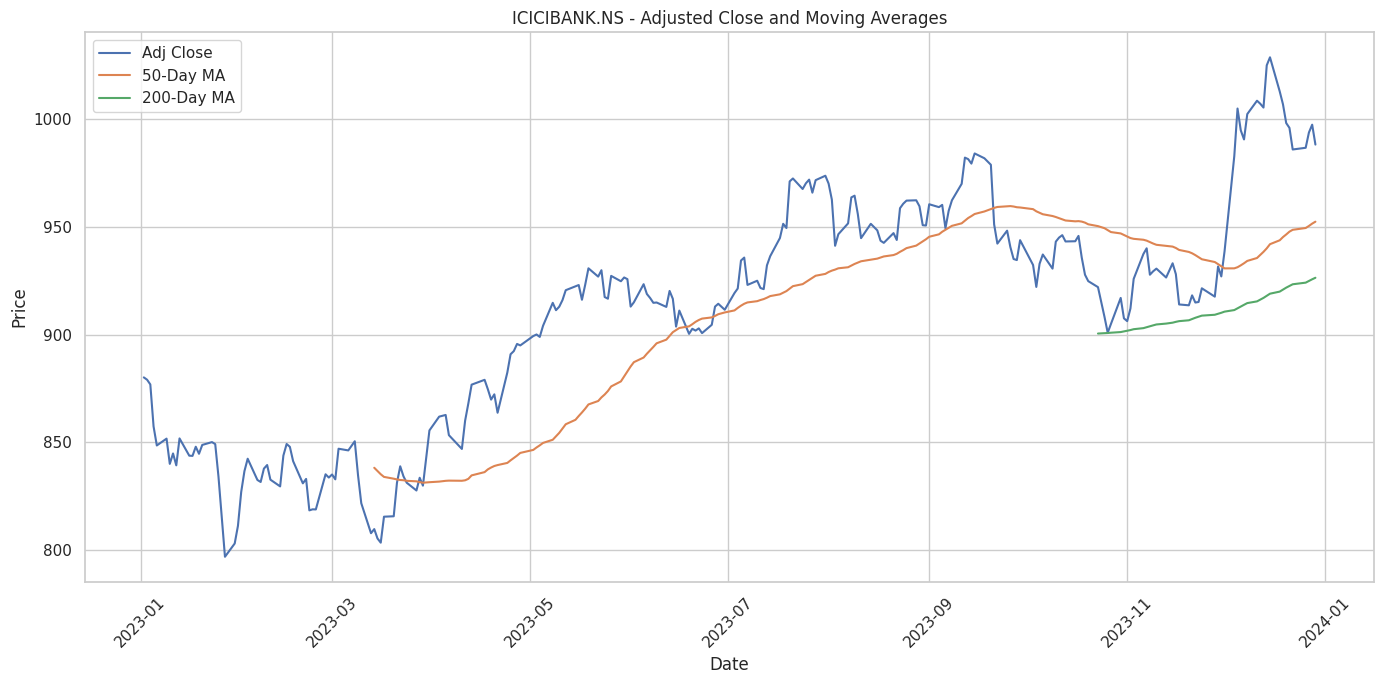

[*********************100%***********************]  5 of 5 completed


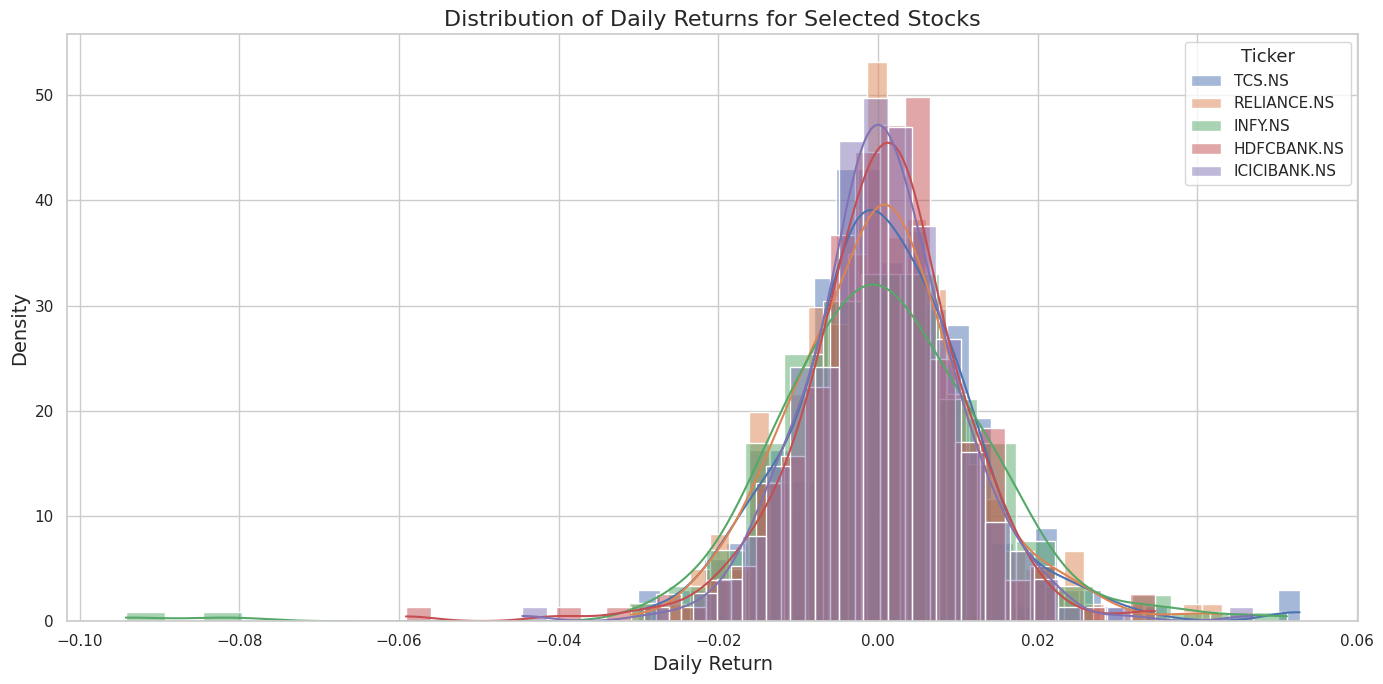

[*********************100%***********************]  5 of 5 completed


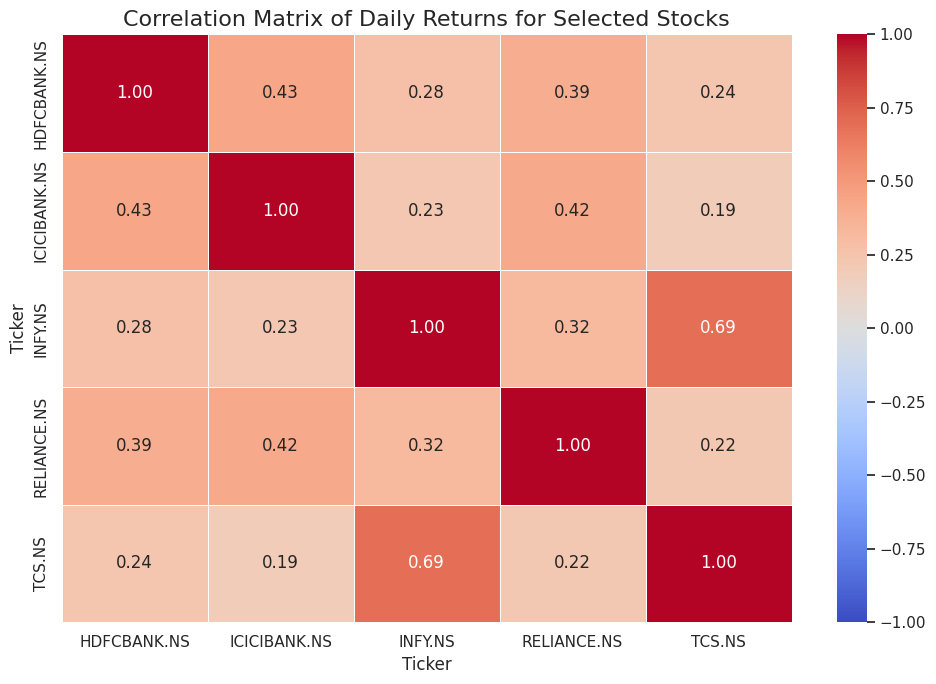

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


              Expected Return  Volatility
Ticker                                   
HDFCBANK.NS          0.075878    0.168585
ICICIBANK.NS         0.131561    0.155775
INFY.NS              0.067288    0.233280
RELIANCE.NS          0.108713    0.173987
TCS.NS               0.206176    0.181727


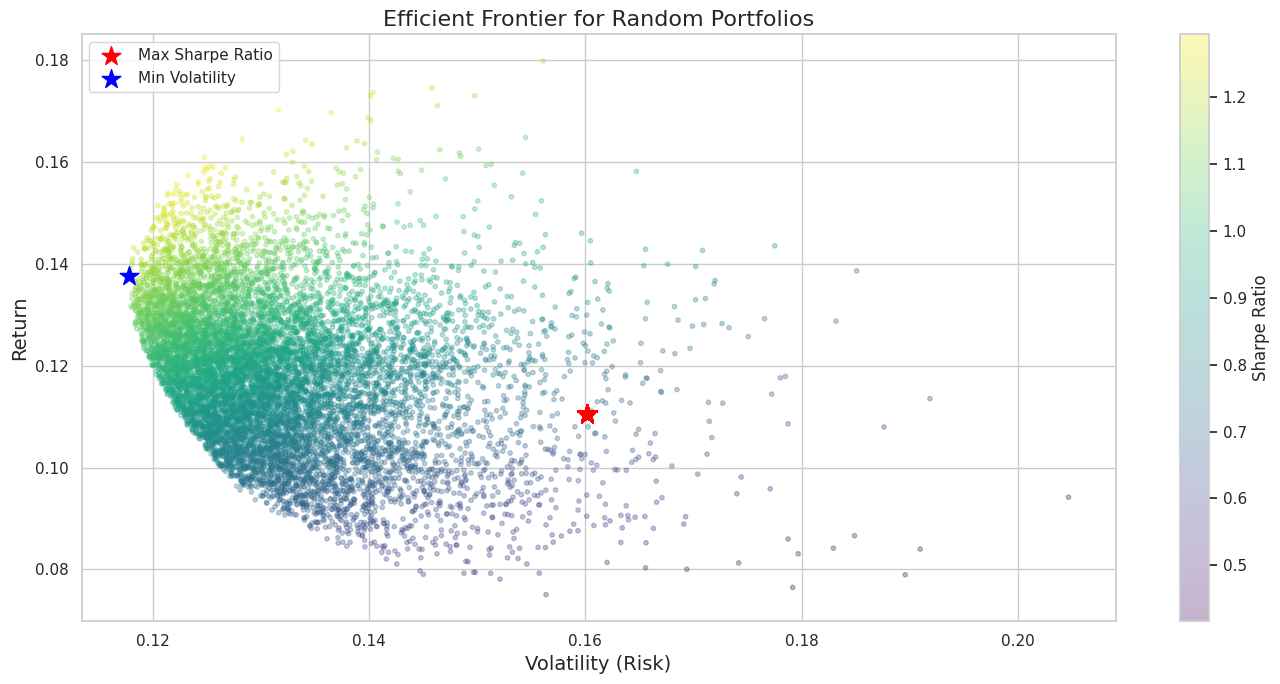

[*********************100%***********************]  5 of 5 completed


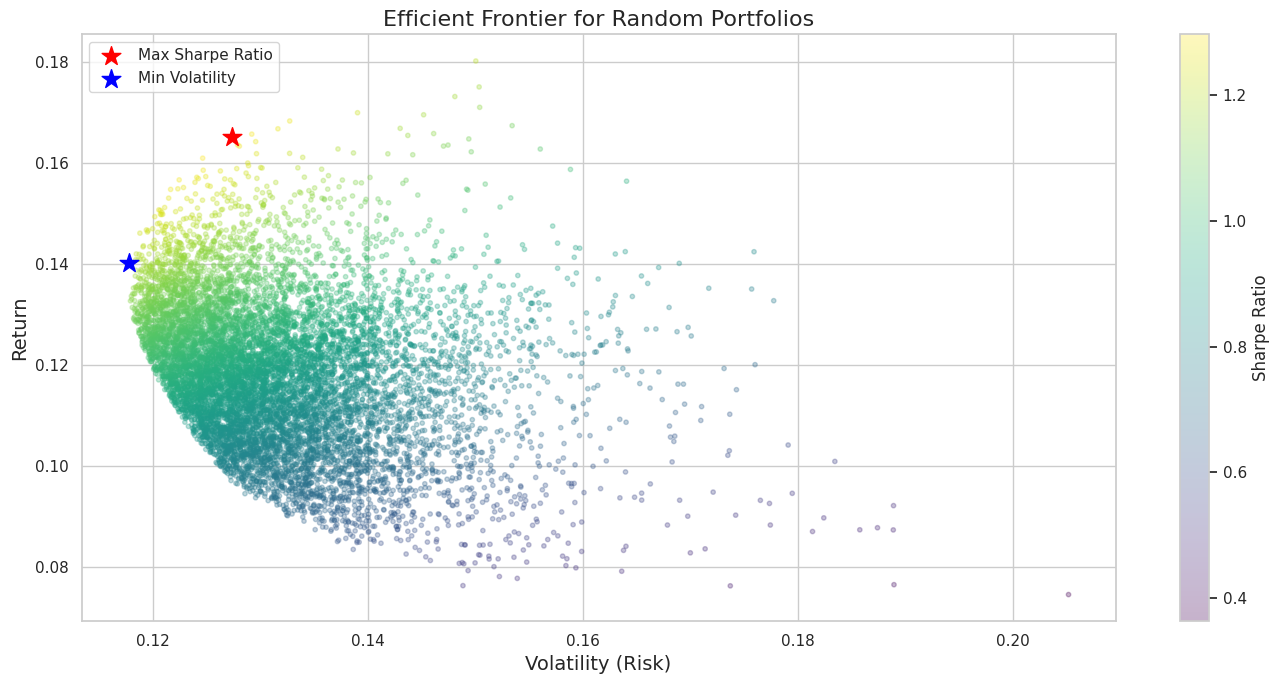

[*********************100%***********************]  5 of 5 completed

Portfolio with Maximum Sharpe Ratio:
Expected Return: 0.1651
Volatility: 0.1273
Sharpe Ratio: 1.2962
Weights: {'TCS.NS': 0.022186552446888035, 'RELIANCE.NS': 0.3413975267539132, 'INFY.NS': 0.009345757757079328, 'HDFCBANK.NS': 0.11753648808903522, 'ICICIBANK.NS': 0.5095336749530843}


Portfolio with Maximum Sharpe Ratio Weights:
TCS.NS: 0.1032
RELIANCE.NS: 0.3859
INFY.NS: 0.0000
HDFCBANK.NS: 0.0648
ICICIBANK.NS: 0.4461


In [ ]:
  import yfinance as yf
import pandas as pd

# Define the stock tickers for some popular Indian companies
# Tickers use the NSE suffix for Yahoo Finance, e.g., 'TCS.NS' for TCS on NSE
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]

# Fetch data for each ticker
data = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
    data[ticker] = stock_data

# Combine data into a single DataFrame
stock_df = pd.concat(data, axis=1)

# Display the first few rows
print(stock_df.head())

import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

# Download stock data for popular Indian companies
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Reset index and melt the DataFrame for seaborn compatibility
stock_data = stock_data.reset_index().melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Plotting
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')
sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Parameters for moving averages
short_window = 50
long_window = 200

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Ensure that stock_data is a DataFrame, in case it has multi-level indexing
stock_data = stock_data.reset_index().set_index("Date")  # Set "Date" as the index if not already

# Loop through each ticker to compute moving averages and plot
for ticker in tickers:
    # Select data for the specific ticker and drop NaN values
    ticker_data = pd.DataFrame(stock_data[ticker].copy())  # Ensure ticker_data is a DataFrame
    ticker_data.dropna(inplace=True)  # Remove any rows with NaN values

    # Calculate the 50-day and 200-day moving averages
    ticker_data['50_MA'] = ticker_data[ticker].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data[ticker].rolling(window=long_window).mean()

    # Plot Adjusted Close and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data[ticker], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()  # pct_change() gives daily returns, dropna removes NaNs

# Plot the distribution of daily returns
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
for ticker in tickers:
    sns.histplot(daily_returns[ticker], kde=True, label=ticker, bins=30, stat="density", common_norm=False)

plt.title('Distribution of Daily Returns for Selected Stocks', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()  # pct_change() gives daily returns, dropna removes NaNs

# Compute the correlation matrix of daily returns
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Set plot labels and title
plt.title('Correlation Matrix of Daily Returns for Selected Stocks', fontsize=16)
plt.tight_layout()
plt.show()

import yfinance as yf
import pandas as pd

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()  # pct_change() gives daily returns, dropna removes NaNs

# Calculate the expected return (mean of daily returns) and volatility (standard deviation of daily returns)
expected_returns = daily_returns.mean() * 252  # Annualize expected returns (252 trading days)
volatility = daily_returns.std() * (252 ** 0.5)  # Annualize volatility (sqrt of 252 trading days)

# Display the results
result = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

# Print the result
print(result)


import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()

# Calculate the expected return (mean of daily returns) and covariance matrix of returns
expected_returns = daily_returns.mean() * 252  # Annualized expected returns (252 trading days)
cov_matrix = daily_returns.cov() * 252  # Annualized covariance matrix

# Number of random portfolios to simulate
num_portfolios = 10000

# Arrays to store results
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

# Generate random portfolios
for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights so that they sum to 1

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights.append(weights)

# Convert results to a DataFrame for easy handling
portfolio_results = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities
})

# Plot the efficient frontier
plt.figure(figsize=(14, 7))
plt.scatter(portfolio_results['Volatility'], portfolio_results['Return'], c=portfolio_results['Return']/portfolio_results['Volatility'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')

# Mark the maximum Sharpe ratio portfolio
max_sharpe_idx = portfolio_results['Return']/portfolio_results['Volatility'].idxmax()
max_sharpe_volatility = portfolio_results.iloc[max_sharpe_idx]['Volatility']
max_sharpe_return = portfolio_results.iloc[max_sharpe_idx]['Return']
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', marker='*', s=200, label='Max Sharpe Ratio')

# Mark the minimum volatility portfolio
min_vol_idx = portfolio_results['Volatility'].idxmin()
min_vol_volatility = portfolio_results.iloc[min_vol_idx]['Volatility']
min_vol_return = portfolio_results.iloc[min_vol_idx]['Return']
plt.scatter(min_vol_volatility, min_vol_return, color='blue', marker='*', s=200, label='Min Volatility')

# Labels and title
plt.title('Efficient Frontier for Random Portfolios', fontsize=16)
plt.xlabel('Volatility (Risk)', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()

# Calculate the expected return (mean of daily returns) and covariance matrix of returns
expected_returns = daily_returns.mean() * 252  # Annualized expected returns (252 trading days)
cov_matrix = daily_returns.cov() * 252  # Annualized covariance matrix

# Number of random portfolios to simulate
num_portfolios = 10000

# Arrays to store results
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe_ratios = []
portfolio_weights = []

# Risk-free rate (can be set to a specific value, here we assume 0 for simplicity)
risk_free_rate = 0.0

# Generate random portfolios
for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights so that they sum to 1

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Calculate Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_sharpe_ratios.append(sharpe_ratio)
    portfolio_weights.append(weights)

# Convert results to a DataFrame for easy handling
portfolio_results = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Identify the portfolio with the maximum Sharpe ratio
max_sharpe_idx = portfolio_results['Sharpe Ratio'].idxmax()
max_sharpe_volatility = portfolio_results.iloc[max_sharpe_idx]['Volatility']
max_sharpe_return = portfolio_results.iloc[max_sharpe_idx]['Return']
max_sharpe_sharpe_ratio = portfolio_results.iloc[max_sharpe_idx]['Sharpe Ratio']
max_sharpe_weights = portfolio_weights[max_sharpe_idx]

# Plot the efficient frontier
plt.figure(figsize=(14, 7))
plt.scatter(portfolio_results['Volatility'], portfolio_results['Return'], c=portfolio_results['Sharpe Ratio'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')

# Mark the maximum Sharpe ratio portfolio
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', marker='*', s=200, label='Max Sharpe Ratio')

# Mark the minimum volatility portfolio
min_vol_idx = portfolio_results['Volatility'].idxmin()
min_vol_volatility = portfolio_results.iloc[min_vol_idx]['Volatility']
min_vol_return = portfolio_results.iloc[min_vol_idx]['Return']
plt.scatter(min_vol_volatility, min_vol_return, color='blue', marker='*', s=200, label='Min Volatility')

# Labels and title
plt.title('Efficient Frontier for Random Portfolios', fontsize=16)
plt.xlabel('Volatility (Risk)', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the details of the portfolio with the maximum Sharpe ratio
print(f"Portfolio with Maximum Sharpe Ratio:")
print(f"Expected Return: {max_sharpe_return:.4f}")
print(f"Volatility: {max_sharpe_volatility:.4f}")
print(f"Sharpe Ratio: {max_sharpe_sharpe_ratio:.4f}")
print(f"Weights: {dict(zip(tickers, max_sharpe_weights))}")

import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns

# Define tickers and download the required data
tickers = ["TCS.NS", "RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
stock_data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate daily returns for each stock
daily_returns = stock_data.pct_change().dropna()

# Calculate the expected return (mean of daily returns) and covariance matrix of returns
expected_returns = daily_returns.mean() * 252  # Annualized expected returns (252 trading days)
cov_matrix = daily_returns.cov() * 252  # Annualized covariance matrix

# Number of random portfolios to simulate
num_portfolios = 10000

# Arrays to store results
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe_ratios = []
portfolio_weights = []

# Risk-free rate (can be set to a specific value, here we assume 0 for simplicity)
risk_free_rate = 0.0

# Generate random portfolios
for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights so that they sum to 1

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Calculate Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_sharpe_ratios.append(sharpe_ratio)
    portfolio_weights.append(weights)

# Convert results to a DataFrame for easy handling
portfolio_results = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Identify the portfolio with the maximum Sharpe ratio
max_sharpe_idx = portfolio_results['Sharpe Ratio'].idxmax()

# Extract the weights of the maximum Sharpe ratio portfolio
max_sharpe_weights = portfolio_weights[max_sharpe_idx]

# Create a dictionary of stock tickers and their corresponding weights in the maximum Sharpe ratio portfolio
max_sharpe_weights_dict = dict(zip(tickers, max_sharpe_weights))

# Print the weights of the stocks in the portfolio with the maximum Sharpe ratio
print("Portfolio with Maximum Sharpe Ratio Weights:")
for ticker, weight in max_sharpe_weights_dict.items():
    print(f"{ticker}: {weight:.4f}")








